## Food/Music Analysis

This analysis is done without peeking at the learning outcomes.

### Setup

We import the `coilnlp` package and load in pre-processed dataframes. Note that `numpy`, `pandas`, and `matplotlib.pyplot` have already been imported as `np`, `pd`, and `plt`, respectively.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from coilnlp import *

In [3]:
# sentences
covid = pd.read_csv('covid-sent.csv', header = 0)
gender = pd.read_csv('gender-sent.csv', header = 0)
english = pd.read_csv('english-sent.csv', header = 0)
fm = pd.read_csv('foodmusic-sent.csv', header = 0)
sent = pd.concat([covid, gender, english, fm], ignore_index = True)
sent.tail()

,TOPIC,STATE,DOCNUM,SENTENCE
1430,foodmusic,us,9,you've probably heard his song with julia mic...
1431,foodmusic,us,9,some of my favorites of his are the few t...
1432,foodmusic,us,9,hey stupid i love you same room one ...
1433,foodmusic,us,9,hope you give them a listen
1434,foodmusic,us,9,NaN


In [4]:
# documents
covid = pd.read_csv('covid-docs.csv', header = 0)
gender = pd.read_csv('gender-docs.csv', header = 0)
english = pd.read_csv('english-docs.csv', header = 0)
fm = pd.read_csv('foodmusic-docs.csv', header = 0)
docs = pd.concat([covid, gender, english, fm], ignore_index = True)
docs.head()

,TOPIC,STATE,DOCNUM,TEXT
0,covid,iq,1,the covid 19 pandemic has transformed the cont...
1,covid,iq,10,well today me and my group talked about covid ...
2,covid,iq,11,it was an interesting conversation with my par...
3,covid,iq,12,in the educational process covid 19 changes ev...
4,covid,iq,13,okay in our group discussion meeting today we ...


In [5]:
word_counts(docs[docs['TOPIC'] == 'foodmusic'], max_words = 50)

{'1': 51,
 'music': 50,
 'songs': 32,
 '2': 28,
 'add': 27,
 'one': 27,
 'like': 27,
 'favorite': 24,
 'love': 24,
 'iraqi': 22,
 'bread': 21,
 'make': 21,
 'really': 20,
 'also': 20,
 '4': 20,
 'cup': 19,
 'oil': 19,
 'put': 19,
 'dish': 18,
 'song': 18,
 'al': 18,
 'recipe': 17,
 'enjoy': 16,
 'ingredients': 16,
 'meat': 16,
 'listen': 16,
 'salt': 15,
 'falafel': 14,
 'food': 14,
 'delicious': 14,
 'iraq': 13,
 "i'm": 13,
 'time': 13,
 'different': 12,
 'chicken': 12,
 'sauce': 12,
 'many': 12,
 'pepper': 12,
 'minutes': 12,
 '3': 12,
 'culture': 12,
 'middle': 11,
 'dough': 11,
 'oven': 11,
 'tsp': 11,
 'onions': 11,
 '5': 10,
 'think': 10,
 'hope': 10,
 'water': 10}

The word cloud shows some of the most frequent words in the corpus. We noted other interesting words in the print output: american, (iraq, iraqi), love, like, favorite, bread, song, music, cultur, falafel, chicken, pepper, salt, oil, sauce.

#### Juxtaposed word clouds

United States (Food/Music)


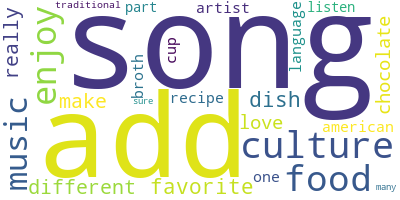

In [6]:
print('United States (Food/Music)')
make_word_cloud(docs[(docs['STATE'] == 'us') & (docs['TOPIC'] == 'foodmusic')]).to_image()

Iraq (Food/Music)


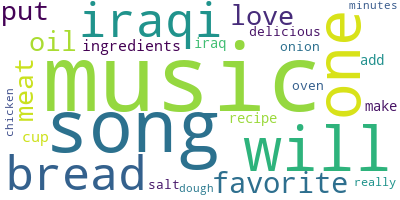

In [7]:
print('Iraq (Food/Music)')
make_word_cloud(docs[(docs['STATE'] == 'iq') & (docs['TOPIC'] == 'foodmusic')]).to_image()

For the food/music prompt, chocolate, broth, and tradition are used by US students. salt, onion, oil, bread, meat, chicken are used by IQ students. recipe is used by both groups. IQ students now use iraq and iraqi more whereas US students use american. 

#### Term frequency inverse document frequency

Each document focuses on some words and ideas more so than other words and ideas. We can look at the most frequent words for each document.

In [8]:
top_tfidf_terms(docs[docs['TOPIC'] == 'foodmusic'], 3)

,Topic,State,DocID,Tfidf 1,Tfidf 2,Tfidf 3
0,foodmusic,iq,1,dolma,mom,tbsp
1,foodmusic,iq,10,kebab,grilled,grill
2,foodmusic,iq,11,kibbeh,add,meat
3,foodmusic,iq,12,shawarma,tsp,chicken
4,foodmusic,iq,13,spicy,totally,pumpkin
5,foodmusic,iq,14,potatoes,oven,teaspoon
6,foodmusic,iq,15,croissant,cocoa,contains
7,foodmusic,iq,16,cup,sugar,heat
8,foodmusic,iq,17,al,maqam,arabic
9,foodmusic,iq,18,pieces,iraq,shamma


#### Novel words

While most words not found in the WordNet English dictionary are mistyped/misspelled, some are foreign words. These words are interesting in that they indicate cross-cultural communication.

The food/music prompt generated many foreign words.

In [9]:
novel = novel_words(docs)

In [10]:
with open('novel-export-v2.txt', 'w') as f:
    for word in novel:
        f.write(word)
        f.write('\n')

In [11]:
with open('novel-import-v2.txt', 'r') as f:
    print(f.read().split('\n')[:-1])

['kibbeh', 'badna', 'jawza', 'mansaf', 'majid', 'baghdadi', 'nazem', 'ghazali', 'ahlan', 'hammoud', 'zaydan', 'nasir', 'joji', 'dalia', 'haqi', 'khubz', 'mansour', 'ahebek', "qur'an", 'saad', '1948', 'sahir', 'hawi', 'dunbug', 'kun', 'rashid', 'qundarchi', 'irmak', 'kahoat', 'armani', 'ajram', 'brockhampton', 'fusul', 'adele', 'dolma', 'moussoula', 'sulic', 'strach', 'hassan', 'samoon', 'adha', 'alkhuder', 'aiko', 'luka', 'kifak', 'quranic', "a'dhami", 'siu', 'okhra', 'saif', 'chalghi', 'boz', 'kleichat', 'dumbeg', 'celine', "a'am", 'hamid', 'blondie', 'muhur', 'rejab', 'qubbanchi', 'unuturum', 'hantoor', 'maher', 'falastini', 'ghaly', 'najm', 'aleikum', 'spotify', 'husayni', 'lana', 'abdulrahman', 'aksu', 'yusuf', 'ganoush', 'mohem', 'basmati', 'amba', 'kitab', 'thomeyah', 'lughat', 'nished', 'facebook', 'nisaa', 'aksoy', 'mohandis', 'tannour', 'fava', 'eillsh', 'xiu', "qari'", 'katy', 'coz', 'eid', 'akhi', 'kubbah', 'khaiwka', 'hussain', 'buble', '1986', 'hokkien', "beta'alla", 'pho'

### Topic Modeling

We explore two statistical methods to find topics in documents: latent Dirichlet allocation and non-negative matrix factorization.

In [12]:
bow, mdl = lda(docs, 4)
lda_topics(mdl, bow, 10)

,Topic 1,Topic 2,Topic 3,Topic 4
0,language,add,song,woman
1,english,cup,music,gender
2,learning,recipe,love,education
3,learn,bread,favorite,also
4,also,dish,really,learning
5,people,oil,like,student
6,lingua,make,listen,family
7,english_language,put,one,group
8,franca,onion,food,men
9,one,meat,culture,one


In [13]:
bow, mdl = lda(docs, 8)
lda_topics(mdl, bow, 10)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8
0,woman,add,language,learning,song,iraq,make,food
1,gender,cup,english,student,music,school,chicken,culture
2,men,oil,learning,online,favorite,group,bread,dish
3,education,onion,learn,also,love,woman,like,different
4,family,meat,one,covid,like,one,reason,part
5,inequality,ingredient,also,time,listen,discussed,heat,country
6,issue,recipe,people,pandemic,iraq,stem,iraqi,recipe
7,society,put,lingua,education,artist,allowed,people,food_important
8,also,salt,english_language,life,really,many,really,mixture
9,discussion,pepper,franca,class,hope,expectation,many,important


For latent Dirichlet allocation, we find main groups that correspond to the prompts. Inferring more groups results in many small groups that correspond to specific foods, recipes, and music.

In [14]:
vectorizer, mdl = nmf(docs, 4)
nmf_topics(mdl, vectorizer, 4, 10)

,Topic 1,Topic 2,Topic 3,Topic 4
0,searched,english,croissant,songs
1,mansaf,language,cocoa,love
2,delicious,learning,contains,music
3,try,women,stuffed,turkish
4,recipe,also,cozonac,artists
5,dish,lingua,butter,amazing
6,really,franca,appetit,really
7,considering,people,bon,listening
8,sometime,group,think,count
9,absolutely,learn,cup,celine


In [15]:
vectorizer, mdl = nmf(docs, 8)
nmf_topics(mdl, vectorizer, 8, 10)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8
0,searched,english,croissant,songs,sometime,women,mentioning,spicy
1,mansaf,language,contains,love,considering,gender,shamma,pumpkin
2,dish,learning,cocoa,turkish,perfect,education,naseer,totally
3,try,lingua,stuffed,artists,absolutely,men,musician,cooking
4,recipe,franca,cozonac,count,described,inequalities,fan,bread
5,delicious,people,butter,celine,looks,iraq,link,seems
6,really,learn,appetit,dion,sure,family,might,express
7,typically,languages,bon,lists,try,also,music,care
8,served,used,think,listening,recipe,group,amazing,easy
9,rice,also,cup,music,delicious,families,thanks,others


In [16]:
vectorizer, mdl = nmf(docs, 12)
nmf_topics(mdl, vectorizer, 12, 10)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12
0,searched,english,croissant,turkish,sometime,women,mentioning,spicy,lists,cup,learning,music
1,mansaf,language,cocoa,songs,considering,gender,shamma,pumpkin,count,sugar,pandemic,love
2,dish,lingua,contains,sezen,perfect,men,naseer,totally,celine,heat,covid,artist
3,try,franca,stuffed,aksu,absolutely,inequalities,musician,cooking,dion,syrup,students,listen
4,recipe,people,cozonac,love,described,education,fan,bread,takes,oil,online,songs
5,delicious,learn,butter,hear,looks,iraq,link,seems,artists,milk,education,favorite
6,really,learning,appetit,katy,sure,legal,might,express,days,mixed,talked,khalid
7,typically,languages,bon,adele,try,woman,amazing,care,listening,flour,impact,song
8,served,used,think,perry,recipe,family,thanks,easy,amazing,cardamom,study,artists
9,mom,communicate,eid,michael,delicious,society,everyone,others,songs,water,also,saxe


In [17]:
vectorizer, mdl = nmf(docs, 16)
nmf_topics(mdl, vectorizer, 16, 10)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16
0,searched,english,croissant,turkish,considering,women,mentioning,spicy,lists,cup,learning,music,iraqi,julia,power,okra
1,mansaf,language,cocoa,songs,sometime,gender,shamma,pumpkin,celine,sugar,pandemic,khalid,meat,saxe,still,beef
2,dish,lingua,contains,aksu,looks,men,naseer,totally,count,heat,covid,love,add,michaels,strongly,albamiya
3,try,franca,stuffed,sezen,perfect,iraq,musician,cooking,dion,syrup,students,artists,fish,really,break,textures
4,recipe,people,cozonac,love,absolutely,inequalities,fan,bread,takes,milk,online,listen,kubbah,song,ideally,spiced
5,delicious,learn,butter,hear,described,legal,link,seems,artists,mixed,education,favorite,rice,hey,seemingly,margat
6,really,learning,appetit,perry,sure,education,might,express,days,cardamom,talked,artist,lemon,stupid,linkage,flavors
7,typically,languages,bon,adele,try,woman,amazing,care,listening,flour,impact,songs,tbl,enjoying,address,stew
8,served,used,think,michael,recipe,family,thanks,others,amazing,water,discussion,apple,mosul,probably,masculinity,staples
9,celebrations,communicate,eid,buble,delicious,society,everyone,easy,songs,oil,study,spotify,burghul,talented,unbreakable,classic


For non-negative matrix factorization, we find the same major groups. These groups are described by more interesting words. NMF fairs better for more groups, but the groups are still not well-separated. Many groups in NMF correspond to food, recipes, and music.

### Sentences

Words are great, but context is important! Based on key words we notice above, we can search for the sentences where the words reside. We can print these in the notebook, or we can print them to a file.

In [18]:
# printing
for tup in find_word_in_sentences('bread', sent):
    print('Topic : ' + tup[0])
    print('State : ' + tup[1])
    print('DocID : ' + str(tup[2]))
    print('Text : ' + tup[5])
    print('\n')

Topic : foodmusic
State : iq
DocID : 12
Text :  for serving  2 potatoes sliced in ngers and fried lettuce pickled cucumber or any pickles  optional  garlic sauce   thomeyah     1 cup yogurt 1 cup mayonnaise 1 garlic clove finely minced .  directions  cut chicken breast in thin small pieces like shawarma  then mix all the spice in shawarma ingredients with yogurt and vinegar or lemon marinate the chicken for about 10 minutes in refrigerator or until you fry potatoes and make bread .  heat the pan with oil over medium high heat then place the chicken gradually so the pan doesn't cool down leave for several minutes and then stir fry for few minutes until cooked 


Topic : foodmusic
State : iq
DocID : 10
Text :  roasting method  mix all ingredients well and knead until the mixture becomes firm .  spread the mixture on the wide skewers of kebabs then grill over charcoal and place the kebabs on the bread .  and pull out the skewers sprinkle with sumac and parsley


Topic : foodmusic
State : 

In [19]:
words = ['bread','song','music','tradition','america','iraq','meat',
         'onion','chicken','pepper','salt','love','like','favorite',
         'chocolate','recipe','ingredients','turkish','grill',
         'sauce','oil','cup','dish'
        ]

In [20]:
# saving
import re
for word in words:
    with open('searches/' + word + '-iq-foodmusic.txt', 'w') as f:
        for tup in set(find_word_in_sentences(word, sent[(sent['TOPIC'] == 'foodmusic') & (sent['STATE'] == 'iq')])):
            f.write('Topic : ' + tup[0]); f.write('\n')
            f.write('State : ' + tup[1]); f.write('\n')
            f.write('DocID : ' + str(tup[2])); f.write('\n')
            f.write('Text : ' + re.sub(r'\.', '.\n', tup[5])); f.write('\n')
            f.write('\n')
    with open('searches/' + word + '-us-foodmusic.txt', 'w') as f:
        for tup in set(find_word_in_sentences(word, sent[(sent['TOPIC'] == 'foodmusic') & (sent['STATE'] == 'us')])):
            f.write('Topic : ' + tup[0]); f.write('\n')
            f.write('State : ' + tup[1]); f.write('\n')
            f.write('DocID : ' + str(tup[2])); f.write('\n')
            f.write('Text : ' + re.sub(r'\.', '.\n', tup[5])); f.write('\n')
            f.write('\n')

## End of Notebook

To close, we use the package `coilnlp` to search for sentences containing words that have interesting statistical behavior for the given dataset and research problem. Please review the saved text files to make interpretations and conclusions.